For this example of using Colab, I use a powerful GPU box to generate a cool image!
I've given an example at the bottom of this colab that runs on a free T4.  
To try out the free image generation


In [2]:
# Disregard the error that pip gives you when you run this - all should be well!

!pip install -q diffusers transformers accelerate bitsandbytes datasets fsspec==2023.9.2

# Important Note

1. If you haven't already done so, create a **free** HuggingFace account at https://huggingface.co and navigate to Settings from the user menu on the top right. Then Create a new API token, giving yourself write permissions.

**IMPORTANT** when you create your HuggingFace API key, please be sure to select read/write permissions for your key by clicking on the WRITE tab, otherwise you may get problems later.

2. Back here in colab, press the "key" icon on the side panel to the left, and add a new secret:  
   In the name field put `HF_TOKEN`  
   In the value field put your actual token: `hf_...`  
   Ensure the notebook access switch is turned ON.

3. Execute the cell below to log in. You'll need to do this on each of your colabs. It's a really useful way to manage your secrets without needing to type them into colab. There's also a shortcut to simply overwrite the line below with:  
   `hf_token = "hf_...."`  
   But this isn't a best practice, as you'd have to be careful not to share the colab. And one of the great things about colabs is that you can share them!


In [3]:
from huggingface_hub import login
from google.colab import userdata


hf_token = userdata.get('HF_TOKEN')
login(hf_token, add_to_git_credential=True)

# To run image generation on a free T4 box

Please run the code below. The results are not as impressive as the Flux model, but it runs quickly..


In [4]:
!pip install -q diffusers

In [5]:
from diffusers import AutoPipelineForText2Image
import torch

pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sd-turbo", torch_dtype=torch.float16, variant="fp16")
pipe.to("cuda")

prompt = "A futuristic class full of students learning AI coding in a surreal style"
image = pipe(prompt=prompt, num_inference_steps=1, guidance_scale=0.0).images[0]


model_index.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/681M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/618 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/574 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/1.73G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.fp16.safeten(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/655 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/1 [00:00<?, ?it/s]

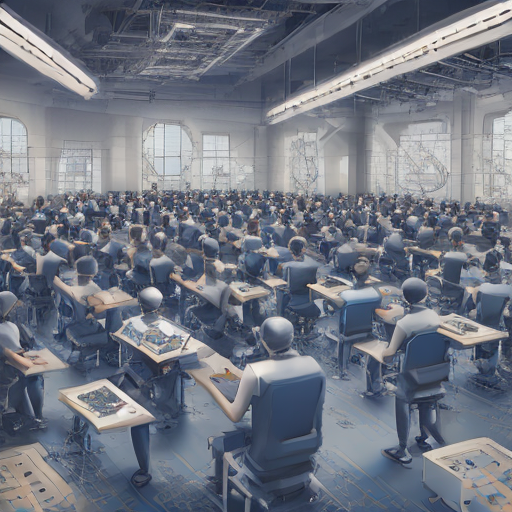

In [6]:
from IPython.display import display
from PIL import Image

# Display the image inline
display(image)